In [2]:
using Revise, PyPlot, Random,  SpecialFunctions
includet("my_sampler.jl")

Generic distribution cumulative and sampling

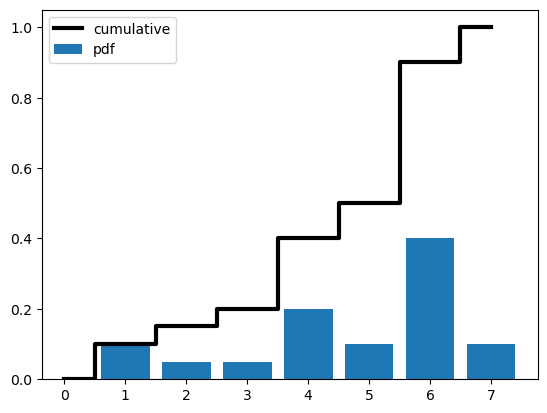

In [3]:
W=[0.1,0.05,0.05,0.2,0.1,0.4,0.1] #ciao
close("all")
plt.bar(1:length(W),W)
plot(0:7, vcat(0,cumsum(W)), "-k", lw=3,drawstyle=Symbol("steps-mid"))
plt.legend(["cumulative","pdf"])
gcf()

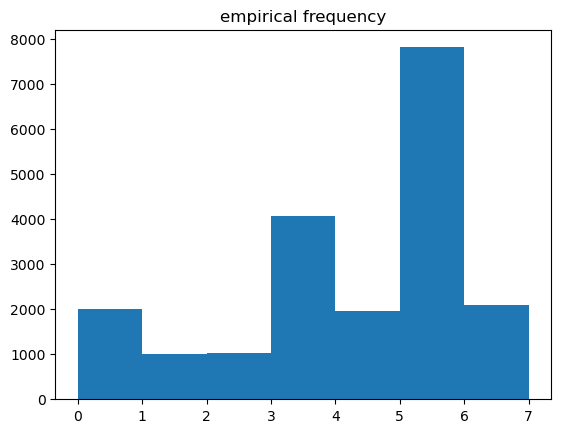

In [5]:
A=sampler(W,20000)
close("all")
hist(A,0:length(W))
plt.title("empirical frequency")
gcf()

Binomial distribution

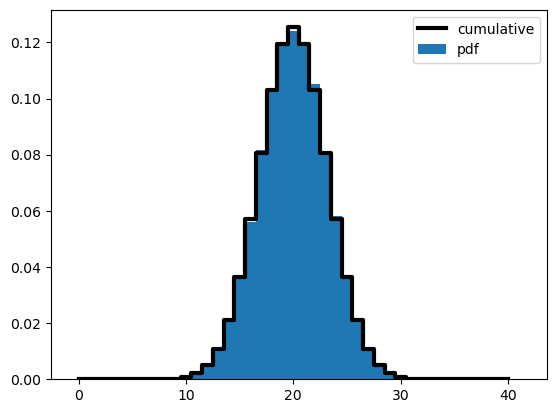

In [11]:
close("all")
n=40
n_samp=100000
plot(0:n, binw(n,0.5),"-k", lw=3,drawstyle=Symbol("steps-mid"))
plot()
gcf()

Bin=sampler(binw(n,0.5),n_samp)
hist(Bin,0:n+2,density = true, align="left")
plt.legend(["cumulative","pdf"])
gcf()


Sampling from continous distributions

Truncated exponential 

-0.44130281594352694

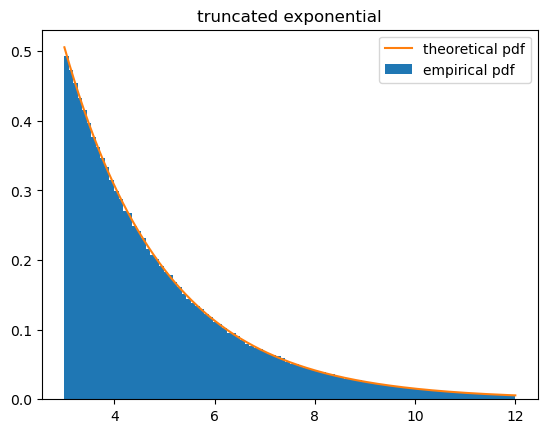

In [19]:
γ=0.5
a = 3
b = 12
nsamples=1000000
z = (1/γ)*(exp(-γ*b)-exp(-γ*a))
print(z)
P(x)=(-1/z)*exp(-γ*x)
v = (-1/z)*(-1/γ)
cum(x) = v*(exp(-γ*x)-exp(-γ*a))
invcum(u)= log(exp(-γ*a) + u/v)*(-1/γ)
close("all")
plt.hist(invcum.(rand(nsamples)),100,density=true)
plot(LinRange(a,b,1024),P.(LinRange(a,b,1024)))
plt.title("truncated exponential")
plt.legend(["theoretical pdf","empirical pdf"])
gcf()


Truncated Gaussian 

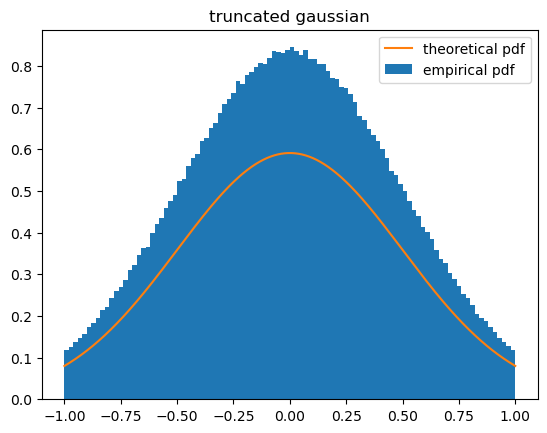

In [77]:
σ=0.5
μ=0
a=-1
b=1
fi(x)=erf((x-μ)/sqrt(2*σ^2))
z=(sqrt(pi)*(fi(b)-fi(a)))/2
invcum(u)=μ+sqrt(2)*σ*erfinv(fi(a)+(2*z*u/sqrt(pi)))
P(x)=(1/z)*exp(-((x-μ)^2)/(2*σ^2))
close("all")
plt.hist(invcum.(rand(nsamples)),100,density=true)
plot(LinRange(a,b,1024),P.(LinRange(a,b,1024)))
plt.title("truncated gaussian")
plt.legend(["theoretical pdf","empirical pdf"])
gcf()